## 1. Iris dataset

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<IPython.core.display.Javascript object>


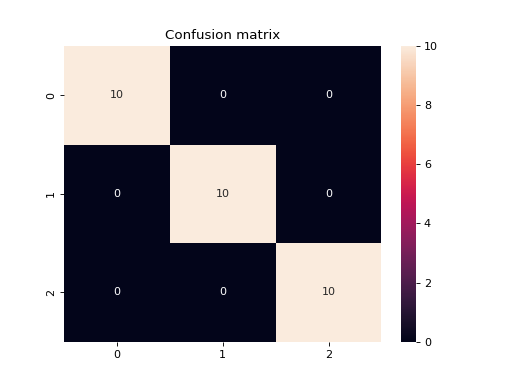

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#Split the data into training and test sets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

#Create a list with different options for k
k_list = list(range(1, 50))

# We will store accuracy in the acc list
acc = []

#Iterate through the list of k's
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(x_test)

    #Storing accuracy and k value for each k
    acc.append([accuracy_score(y_test, y_pred), k])

# Finding best k and
best_score = max(acc, key=lambda x: x[0])[0]
best_k = min(k for score, k in acc if score == best_score)

#Training model again with the best k to plot the confusion matrix
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True)
ax = plt.title("Confusion matrix")

# Answer 1. Iris Dataset


In [167]:
print (f'The best k = {best_k} , score = {best_score}'.format(best_k,best_score ))

The best k = 8 , score = 1.0


## 2. Synthetic dataset

<IPython.core.display.Javascript object>


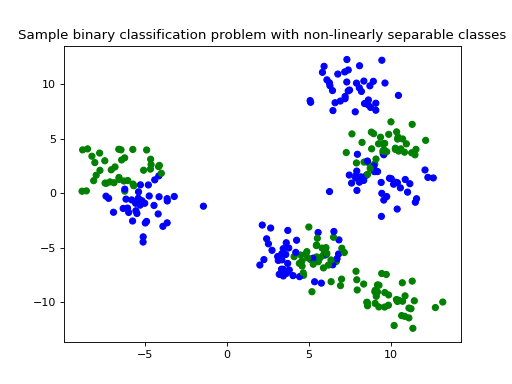

In [168]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

## Visualizing Boundaries with scaled data

<IPython.core.display.Javascript object>


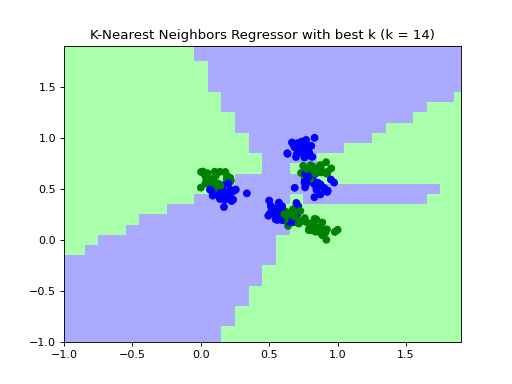

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)


from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

k_range = range(1,50)

acc = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc.append([knn.score(X_test, y_test), k])

# Finding best k and
best_score = max(acc)[0]
best_k = max(acc)[1]

best_score, best_k

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

cmap_light = ListedColormap([ '#AAAAFF', '#AAFFAA'])


x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Nearest Neighbors Regressor with best k (k = %i)" % best_k)
plt.show()


## Visualizing Boundaries with Non Scaled Data

<IPython.core.display.Javascript object>


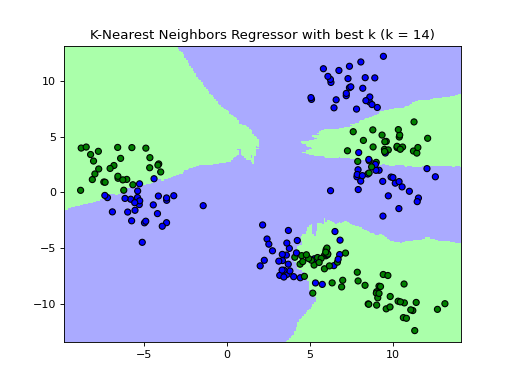

In [173]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)  


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
h = 0.1  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolors='k', marker='o', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("K-Nearest Neighbors Regressor with best k (k = %i)" % best_k)
plt.show()


## Answer 2. Synthetic Dataset

In [172]:
print (f'The best k = {best_k} , score = {best_score}'.format(best_k,best_score ))

The best k = 14 , score = 0.761795743938601
